In [56]:
from truthnet.util import validate
import pandas as pd
import seaborn as sns

In [50]:
from truthnet.truthnet import load_veritas_model
from truthnet.util import drop_empty_string_keys
import numpy as np
M=load_veritas_model('../../veritas_models/veritas_005_SUD.pkl.gz')
df=pd.read_csv('../../data/SUD.csv',index_col=0,
            keep_default_na=False,dtype=str)
featurenames=M['model'].feature_names
training_index=M['model'].training_index
test_index=np.array([x for x in df.index.values if x not in training_index])
df_test=df.loc[test_index,:][featurenames]
D=df_test.T.to_dict()
D1={k:drop_empty_string_keys(v) for k,v in D.items()}
D=[{'SUB'+str(k):v} for k,v in D1.items()]

from truthnet.truthfinder import reveal
Rsud=reveal(D,M,perturb=0,model_path=False,score=False)
resf=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsud[0]}).T
resf.columns=['lower_threshold','lower_p','veritas','veritas_p']
resf=resf.assign(score=resf.lower_threshold)

ckeck passed


In [51]:
df_train=df.loc[training_index,:][featurenames]
Dt=df_train.T.to_dict()
Dt1={k:drop_empty_string_keys(v) for k,v in Dt.items()}
Dt=[{'SUB'+str(k):v} for k,v in Dt1.items()]


Rsudt=reveal(Dt,M,perturb=0,model_path=False,score=False)
resft=pd.DataFrame({x['subject_id']:[x['lower_threshold'],x['lower_prob'],x['veritas'],x['veritas_prob']] for x in  Rsudt[0]}).T
resft.columns=['lower_threshold','lower_p','veritas','veritas_p']
resft=resft.assign(score=resft.lower_threshold)

ckeck passed


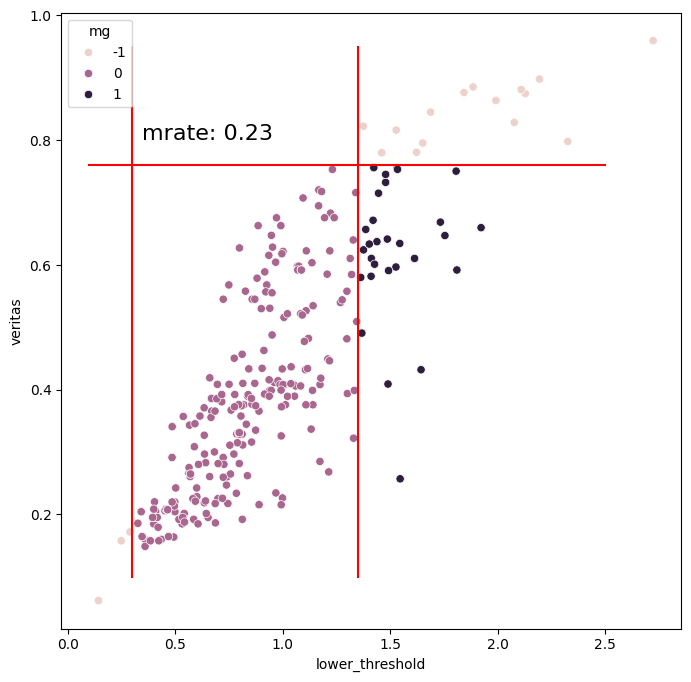

In [61]:
rft=validate(resft,C0=.3,C1=0.76,C2=1.35,DX=False,score=False,
         outfile='sudvalidt.png',
         validation_type='noscore')

<Axes: xlabel='lower_threshold', ylabel='Density'>

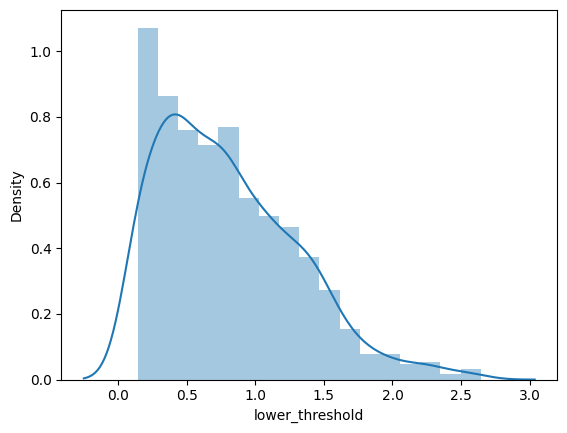

In [63]:
sns.distplot(rf[1].lower_threshold)

<Axes: xlabel='veritas', ylabel='lower_threshold'>

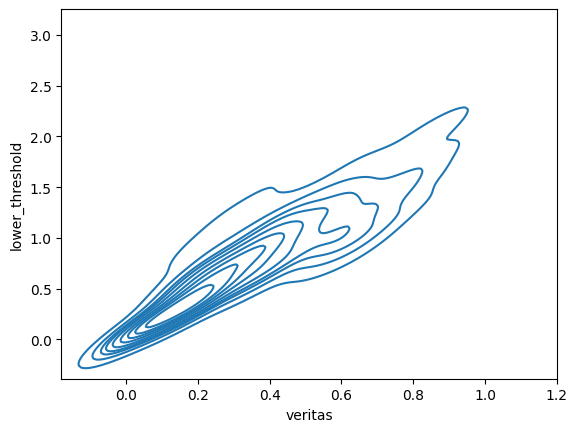

In [54]:
sns.kdeplot(data=rft[1],x='veritas',y='lower_threshold')

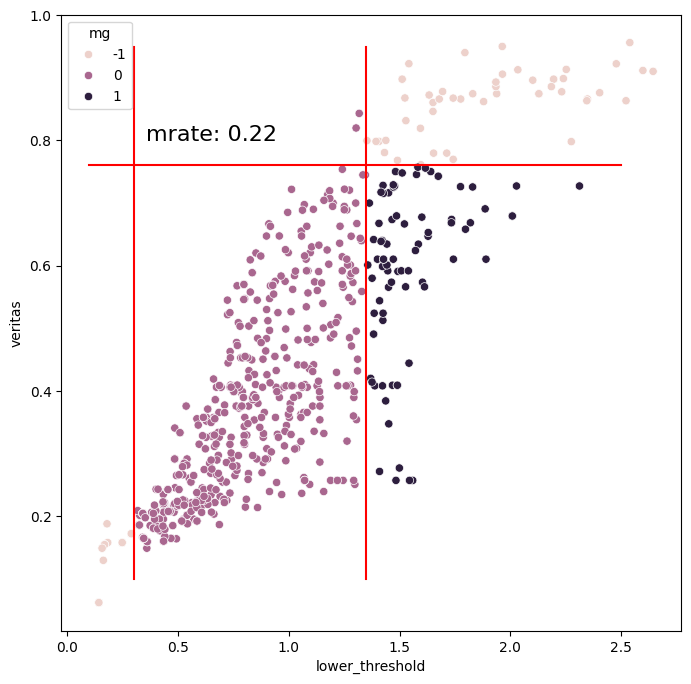

In [60]:
rf=validate(resf,C0=.3,C1=0.76,C2=1.35,DX=False,score=False,
         outfile='sudvalid.png',
         validation_type='noscore')

In [4]:
M

{'version': '0.0.1',
 'model': qnet.Qnet,
 'problem': '',
 'calibration_lower': array([0.68064352, 0.68064352, 0.68064352, ..., 0.63052135, 0.61121131,
        0.46794628]),
 'calibration_veritas': array([0.21498119, 0.21498119, 0.21498119, ..., 0.18910337, 0.25517241,
        0.21819346]),
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f40dc4d4250>,
 'LOWER_THRESHOLD': 0.39808233523721515,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f40dc4d7400>,
 'VERITAS_THRESHOLD': 0.3599903882097282}